PREM-IS-127_6e451b5557 I4 HE1 - 2022-03-25 14.16.02.ndpi


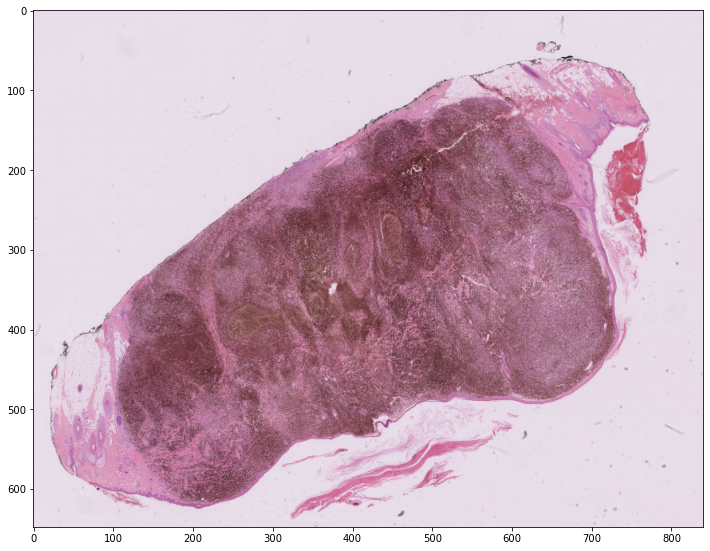

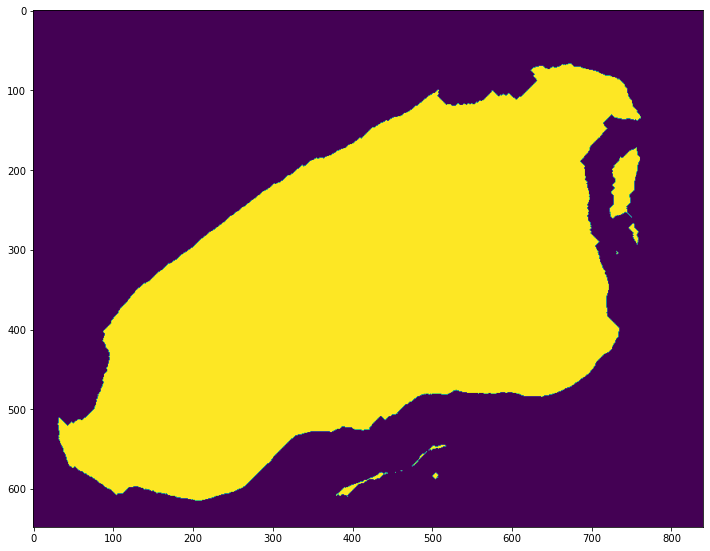

PREM-IS-081_286c7741d0 I1 HE1 - 2022-03-24 20.14.46.ndpi


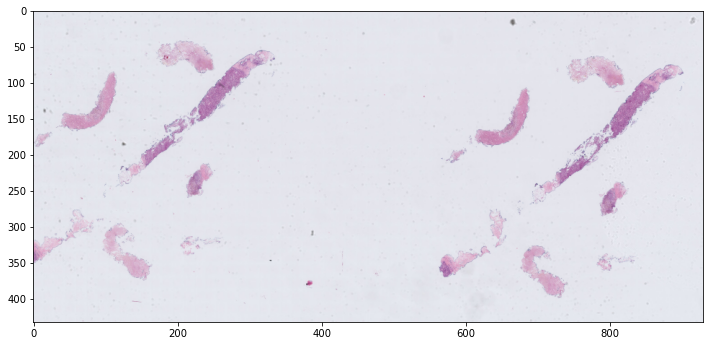

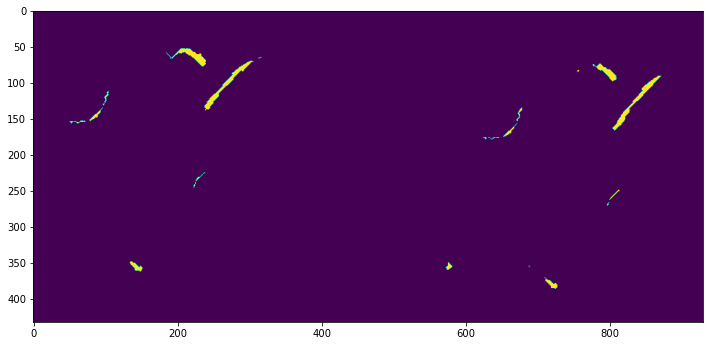

PREM-IS-137_6d9eb60430 I1 HE1 - 2022-03-25 13.37.29.ndpi


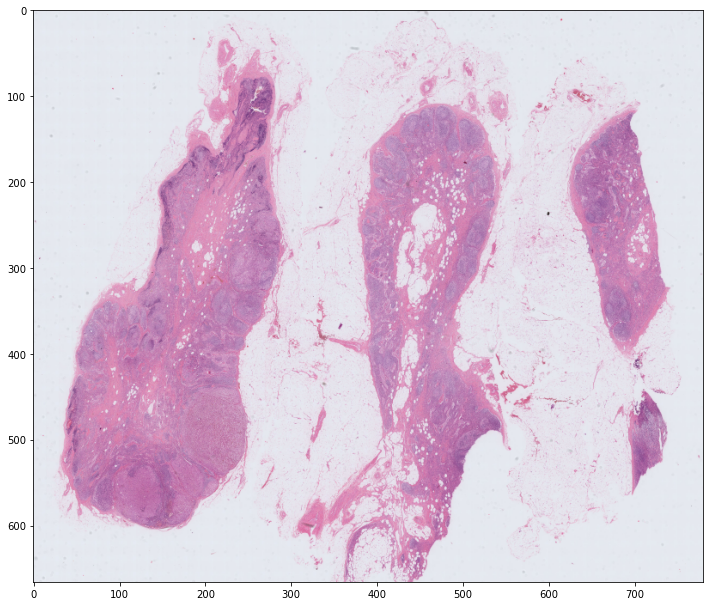

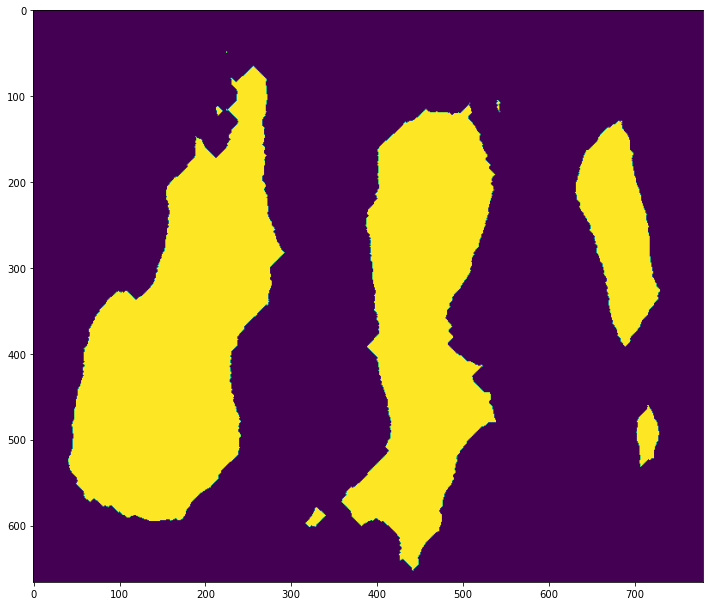

PREM-IS-037_441551d84e I1 HE1 - 2022-03-24 16.57.34.ndpi


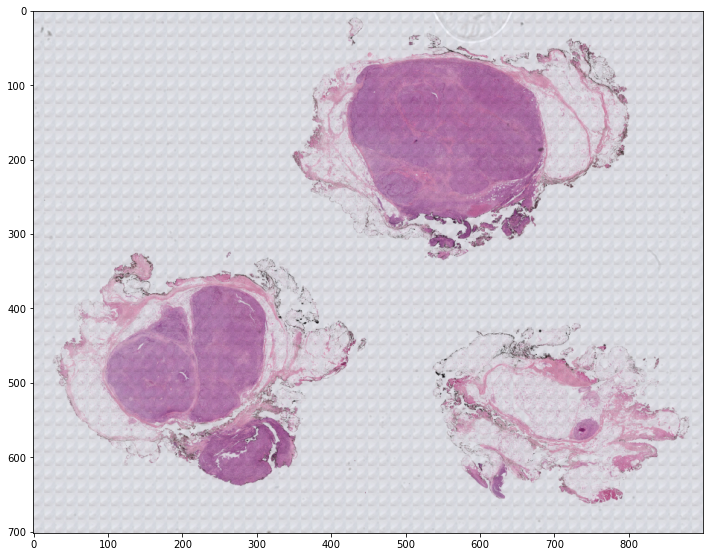

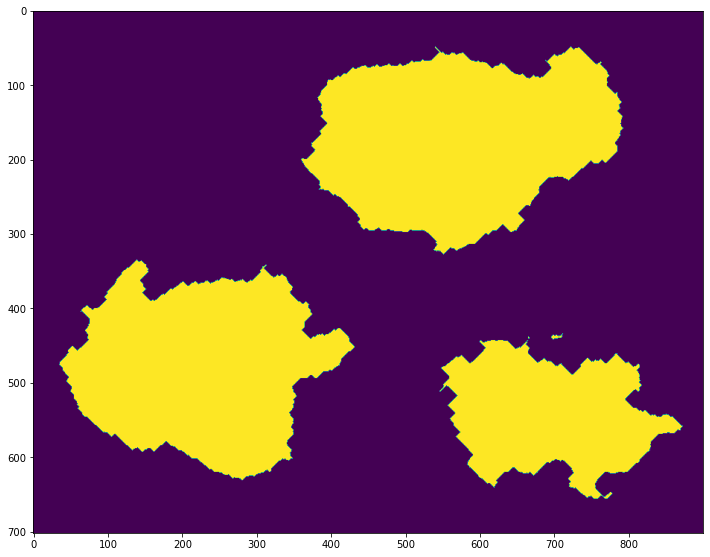

PREM-IS-088_e25a6b677f I1 HE1 - 2022-03-25 10.34.38.ndpi


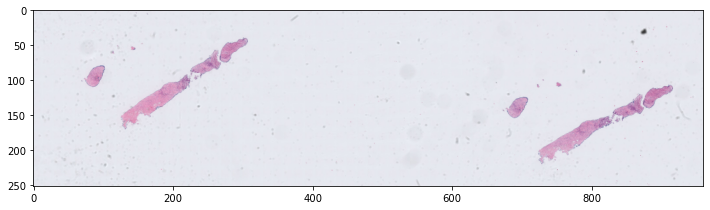

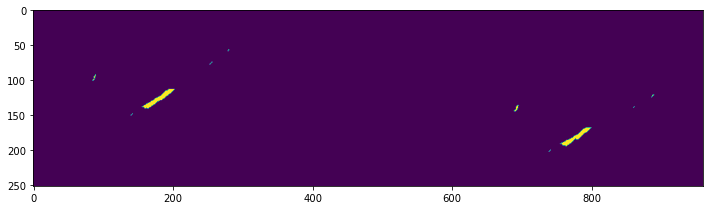

PREM-IS-005_d5fa80a160 I10 HE1 - 2022-03-24 19.45.44.ndpi


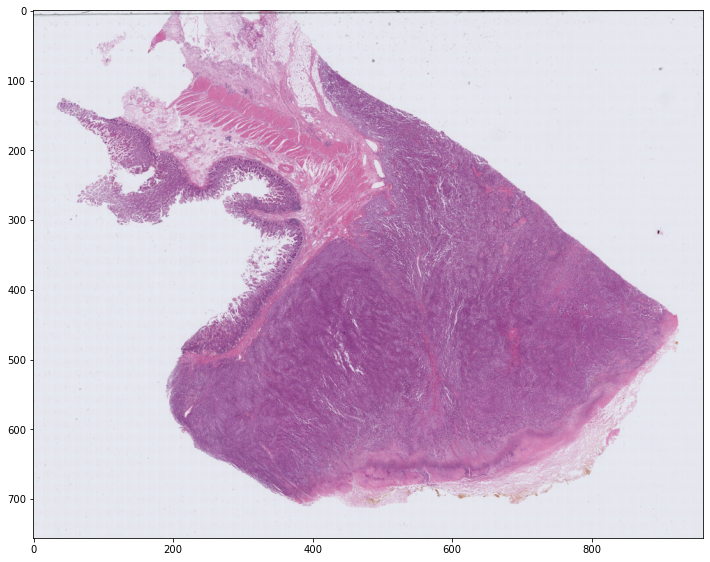

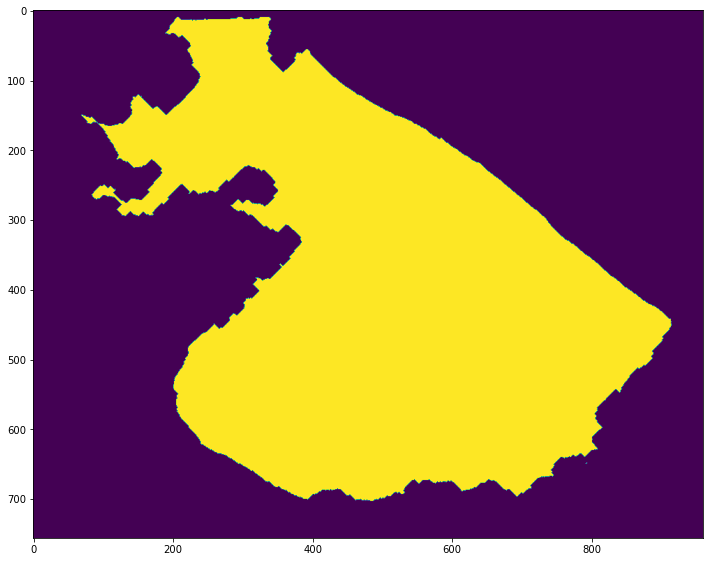

PREM-IS-069_bf802036ef I2 HE1 - 2022-03-24 17.25.00.ndpi


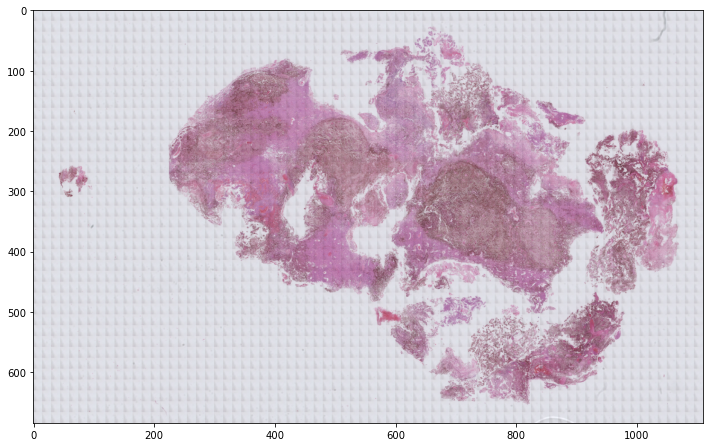

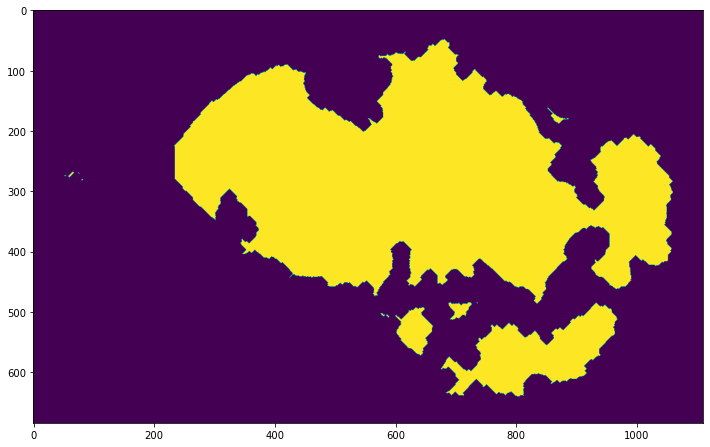

PREM-IS-131_b36f737be9 I1 HE1 - 2022-03-25 13.09.39.ndpi


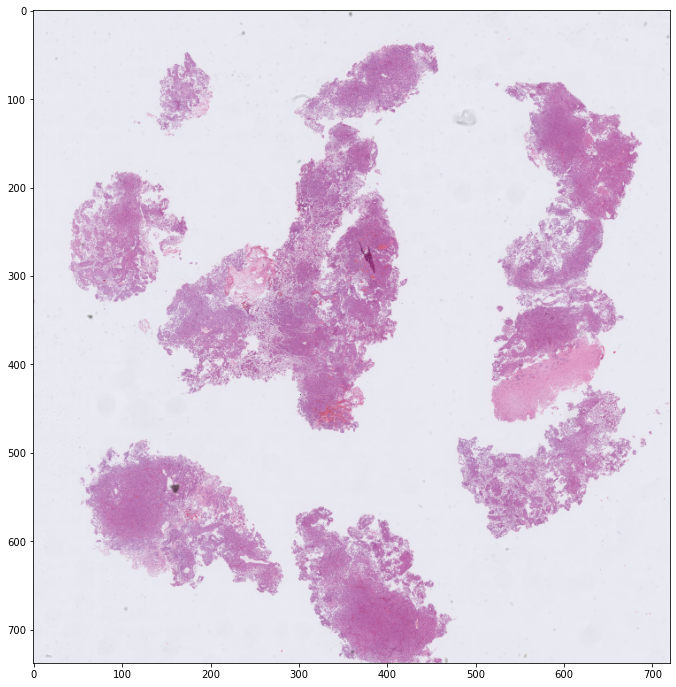

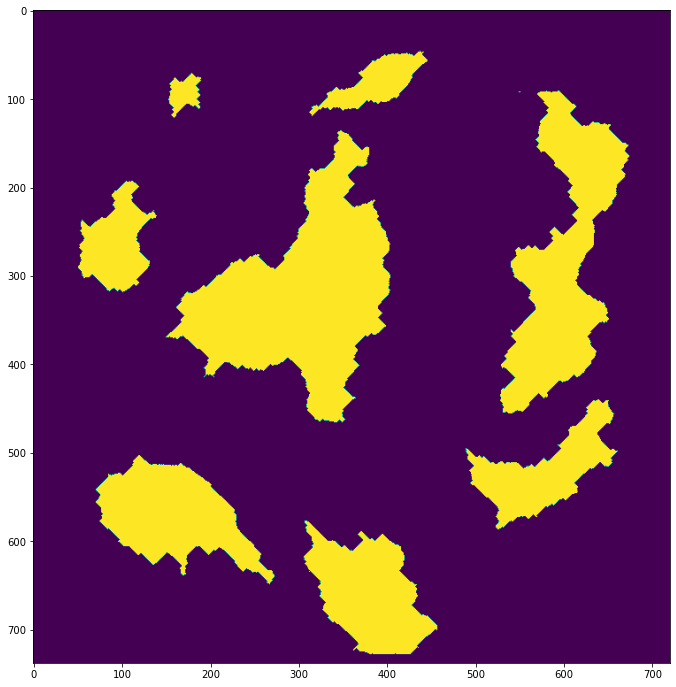

PREM-IS-009_412623daa8 II30 HE1 - 2022-03-24 19.19.23.ndpi


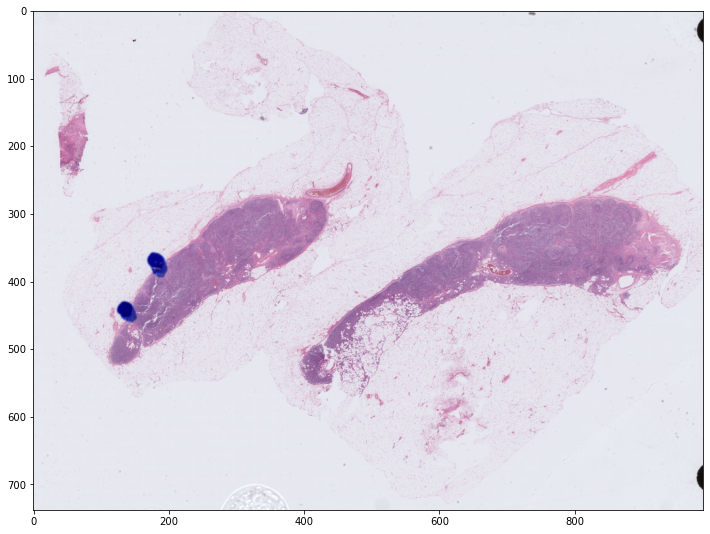

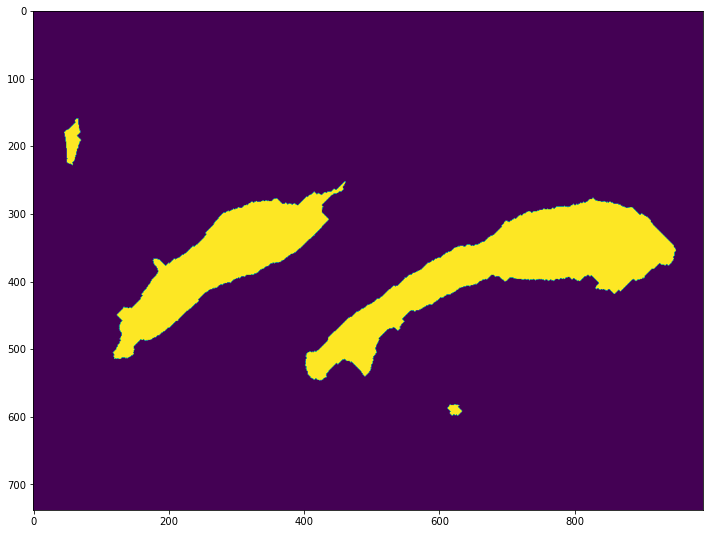

PREM-IS-008_05348b8939 I3 HE1 - 2022-03-24 19.33.36.ndpi


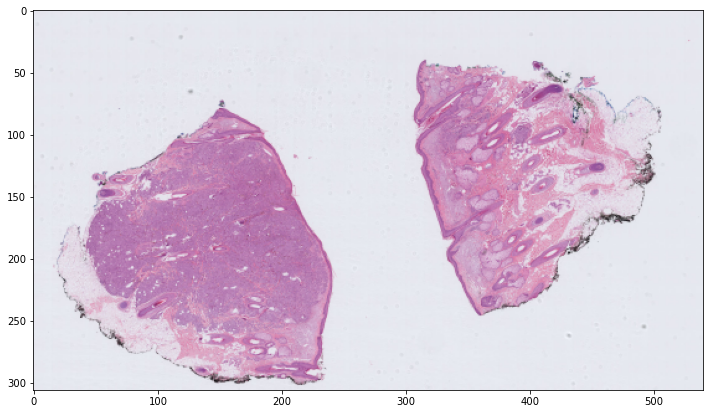

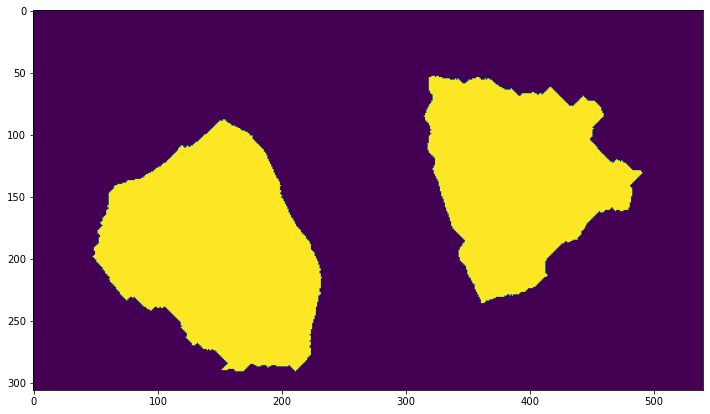

In [19]:
import openslide
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.ndimage.morphology import binary_fill_holes, binary_erosion


r = Path('/home/rens/hpc/PREMIUM histopathology/data/isala/metastasis')

for file in list(r.iterdir())[:10]:
    print(file.name)

    slide = openslide.OpenSlide(str(file))
    
    image = np.array(slide.read_region((0,0), slide.level_count-2, slide.level_dimensions[slide.level_count-2]).convert('RGB'))
    plt.figure(figsize=(12,12))
    plt.imshow(image)
    plt.show()

    mask = image.sum(axis=-1) < 650
    filled_mask = binary_fill_holes(mask)
    # eroded_mask = binary_erosion(filled_mask, iterations=10)
            
    plt.figure(figsize=(12,12))
    plt.imshow(eroded_mask.astype(int))
    plt.show()

In [12]:
slide.level_count

9

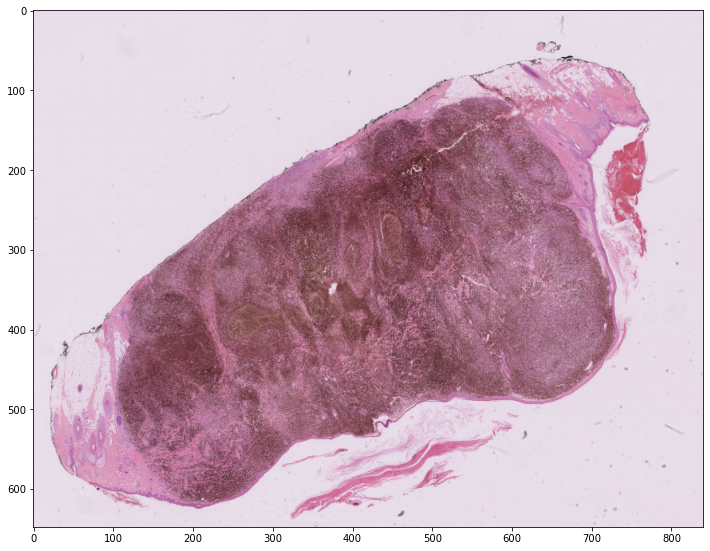

In [14]:
image = np.array(slide.read_region((0,0), slide.level_count-2, slide.level_dimensions[slide.level_count-2]).convert('RGB'))
plt.figure(figsize=(12,12))
plt.imshow(image)
plt.show()


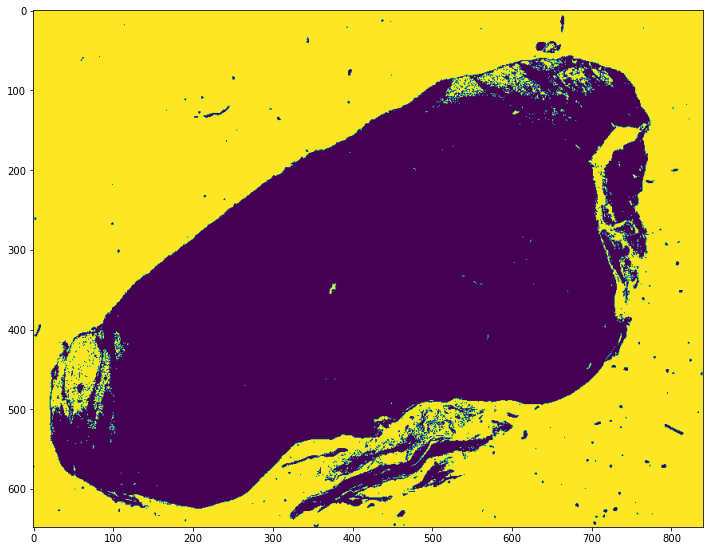

In [15]:
plt.figure(figsize=(12,12))
plt.imshow((image.sum(axis=-1) > 650).astype(int))
plt.show()


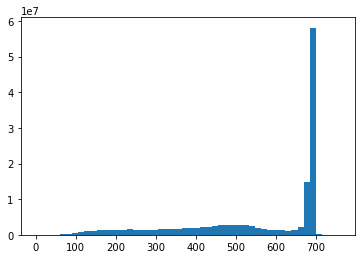

In [7]:
plt.hist(image.sum(axis=-1).flatten(), bins=50)
plt.show()